# Milestone Project 1: Food Vision Big

In [22]:
import tensorflow as tf

In [1]:
import subprocess

def get_gpu_info():
    try:
        # Run the command to get system profiler information on the GPU
        result = subprocess.run(["system_profiler", "SPDisplaysDataType"], capture_output=True, text=True)
        
        # Print the output which includes GPU details
        print(result.stdout)
    except Exception as e:
        print(f"An error occurred: {e}")

get_gpu_info()

Graphics/Displays:

    Apple M2:

      Chipset Model: Apple M2
      Type: GPU
      Bus: Built-In
      Total Number of Cores: 10
      Vendor: Apple (0x106b)
      Metal Support: Metal 3
      Displays:
        Color LCD:
          Display Type: Built-in Liquid Retina Display
          Resolution: 2560 x 1664 Retina
          Main Display: Yes
          Mirror: Off
          Online: Yes
          Automatically Adjust Brightness: Yes
          Connection Type: Internal
        ASUS VY279:
          Resolution: 1920 x 1080 (1080p FHD - Full High Definition)
          UI Looks like: 1920 x 1080 @ 75.00Hz
          Mirror: Off
          Online: Yes
          Rotation: Supported




#### While we do have GPU on this Mac, it might not see the same benefit (increased performance) as would an NVIDIA GPU with tensor cores. So you can try the same code in Google Collab, but be sure to have most of the code ready to run since if not, then you might be run out of time by google collab for days or weeks (if using the GPUs too much).

#### Write the code here, and try to run it. If the Mac has kernel issues (kernel dies) then code everything up and then run on google collab.

In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use Tensorflow Datasets to Download Data

In [3]:
# Get Tensorflow Dataset

#run this on another cell if needed: pip install tensorflow-datasets
import tensorflow_datasets as tfds

datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


2024-08-16 11:23:10.523164: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


In [12]:
# Load in the data (takes some minutes). About 5 Gbs...


(train_data, test_data), ds_info = tfds.load(name= "food101",
                                            split=["train","validation"],
                                            shuffle_files = True,
                                            as_supervised=True, # data gets return as tuple format (data, label) -> for both train_data and tes_data
                                            with_info = True, # downloads metadata into ds_info,
                                            # download = False # IMPORTANT TO RUN IN TRUE JUST THE FIRST TIME, then the rest of the time it wil just fetch it locally.
                                            )

In [13]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [16]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [17]:
class_names = ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Exploring the Food101 data from tensorflow datasets

In [71]:
# Take one sample from our training data
# Use the "take" method

train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [20]:
# Output info about our training sample

for image, label in train_one_sample:
    print(f""" 
    Image shape: {image.shape},
    Image datatype: {image.dtype},
    Target class from Food101: {label},
    Class name (str form): {class_names[label.numpy()]}
    """)

 
    Image shape: (512, 512, 3),
    Image datatype: <dtype: 'uint8'>,
    Target class from Food101: 49,
    Class name (str form): grilled_cheese_sandwich
    


2024-08-18 16:15:22.186112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
# What does our image tensor look like?

image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[239, 217, 157],
        [244, 222, 162],
        [247, 227, 168],
        ...,
        [119, 104,  73],
        [111,  95,  70],
        [105,  89,  66]],

       [[233, 212, 149],
        [239, 218, 155],
        [243, 223, 162],
        ...,
        [117, 102,  71],
        [108,  92,  67],
        [101,  85,  62]],

       [[227, 206, 139],
        [234, 213, 146],
        [238, 219, 153],
        ...,
        [117, 100,  70],
        [108,  91,  65],
        [101,  83,  59]],

       ...,

       [[ 35,   7,  19],
        [ 35,   7,  19],
        [ 36,   8,  20],
        ...,
        [198, 181, 127],
        [196, 179, 125],
        [193, 176, 122]],

       [[ 34,   6,  18],
        [ 34,   6,  18],
        [ 35,   7,  19],
        ...,
        [200, 183, 129],
        [201, 184, 130],
        [198, 181, 127]],

       [[ 33,   5,  17],
        [ 34,   6,  18],
        [ 35,   7,  19],
        ...,
        [203, 186, 13

In [23]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

Text(0.5, 1.0, 'grilled_cheese_sandwich')

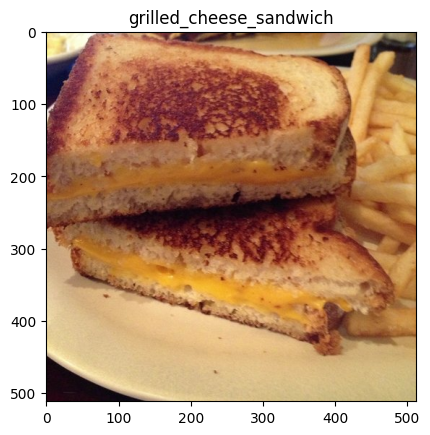

In [25]:
# Plot an image from our tensorflow dataset

import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])

## Create preprocessing functions for our data

In [31]:
def preprocess_img(image, label, img_shape = 224):
    """
    Converts image datatype (in this case 'uint8') -> to 'float32' and reshapes
    image to [image_shape, image_shape, color_channels] 
    """
    image = tf.image.resize(image, [img_shape, img_shape])
    return tf.cast(image, tf.float32), label # return a tuple (float32_image, label)

In [32]:
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}, \n Shape: {image.shape} \nDatatype: {image.dtype} \n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]} \nShape: {preprocessed_img.shape} \nDatatype: {preprocessed_img.dtype} \n")

Image before preprocessing:
 [[[239 217 157]
  [244 222 162]
  [247 227 168]
  ...
  [119 104  73]
  [111  95  70]
  [105  89  66]]

 [[233 212 149]
  [239 218 155]
  [243 223 162]
  ...
  [117 102  71]
  [108  92  67]
  [101  85  62]]], 
 Shape: (512, 512, 3) 
Datatype: <dtype: 'uint8'> 

Image after preprocessing:
 [[[238.7704   217.41327  155.4847  ]
  [242.83673  222.83673  162.55101 ]
  [240.85713  220.20918  164.2143  ]
  ...
  [131.28564  118.28565   75.7806  ]
  [123.88257  109.81113   75.09689 ]
  [106.698746  90.698746  66.4131  ]]

 [[232.16325  212.09183  141.37755 ]
  [238.86224  219.86224  151.07654 ]
  [239.94388  221.08673  155.87245 ]
  ...
  [127.49998  112.49998   71.07145 ]
  [122.63767  106.56623   72.852   ]
  [105.83142   88.47424   63.1886  ]]] 
Shape: (224, 224, 3) 
Datatype: <dtype: 'float32'> 



## Batch and prepare dataset

In [37]:
# Map preprocessing function to training (and parallelize)

train_data = train_data.map(map_func = preprocess_img, num_parallel_calls= tf.data.AUTOTUNE)
# map_fun -> allows us to input a preprocessing function to execute it to the dataset (must be some kind of tf Dataset).
# num_parallel_calls (tf.data.AUTOTUNE)-> helps to automatically set the available number of CPUs available to speed up the process. This avoids using just one CPU chip (if there is more than 1 available)


# Shuffle train_data and turn it into batches and prefetch it (load it in faster)
train_data = train_data.shuffle(buffer_size= 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE) 
# buffer -> How many elements to shuffle at the same time.
# .batch() and .prefetch() are to load faster the data.

# Map preprocessing function to testing data
test_data = test_data.map(map_func = preprocess_img, num_parallel_calls= tf.data.AUTOTUNE).batch(32).prefetch(buffer_size = tf.data.AUTOTUNE) # No need to shuffle testing dataset



In [38]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

In [41]:
from helper_functions import create_tensorboard_callback

# Create a ModelCheckpoint Callback to save a model's progress during training
checkpoint_path = "model/checkpoints/cp.weights.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_acc",
                                                      save_best_only = True,
                                                      save_weights_only = True,
                                                      verbose = 0)

## Setup Mixed Precision Training

#### Most likely I won't be able to use Mixed Precision here because it is a Mac and does not have NVIDIA GPU. I need an nvidia GPU with a score of +7.0. 

#### What i get so far about mixed precision is: That computations are done in float 16 BUT then the variables must be store in float32 for numeric stability. So that is why we change the output_layer d_type policy to be float32

In [47]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [48]:
# Get and print the current global policy
policy = mixed_precision.global_policy()
print(f"Current policy: {policy}")

# List all GPUs and check their compute capabilities
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        details = tf.config.experimental.get_device_details(gpu)
        print(f"GPU details: {details}")
else:
    print("No GPU devices found.")

Current policy: <FloatDTypePolicy "mixed_float16">
GPU details: {'device_name': 'METAL'}


## Build feature extraction model

In [68]:
from tensorflow.keras import layers,  preprocessing

# Create base model

input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = tf.keras.Input(shape=input_shape, name="input_shape")

x = base_model(inputs, training=False) #makes sure layers which should be in inference mode only stay like that

#EfficientNetB0 has rescaling so we do not need to rescale
# x = preprocessing.Rescaling(1./255)(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(len(class_names))(x) # we separated Activation from Dense because we need to include the dtype parameter

outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) # float32 is needed because of some numeric stability...
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # since our labels are in integer form
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [69]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_shape (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 101)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [70]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_shape True float32 <FloatDTypePolicy "mixed_float16">
efficientnetb0 False float32 <FloatDTypePolicy "mixed_float16">
global_average_pooling2d_7 True float32 <FloatDTypePolicy "mixed_float16">
dense_6 True float32 <FloatDTypePolicy "mixed_float16">
softmax_float32 True float32 <FloatDTypePolicy "float32">


In [72]:
for layer in model.layers[1].layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer_9 False float32 <FloatDTypePolicy "mixed_float16">
rescaling_18 False float32 <FloatDTypePolicy "mixed_float16">
normalization_9 False float32 <FloatDTypePolicy "mixed_float16">
rescaling_19 False float32 <FloatDTypePolicy "mixed_float16">
stem_conv_pad False float32 <FloatDTypePolicy "mixed_float16">
stem_conv False float32 <FloatDTypePolicy "mixed_float16">
stem_bn False float32 <FloatDTypePolicy "mixed_float16">
stem_activation False float32 <FloatDTypePolicy "mixed_float16">
block1a_dwconv False float32 <FloatDTypePolicy "mixed_float16">
block1a_bn False float32 <FloatDTypePolicy "mixed_float16">
block1a_activation False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_squeeze False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_reshape False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_reduce False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_expand False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_excite False float32 <FloatDTyp

# Fit the feature extraction model

### My epochs are taking about 14 minutes or so each, and the tutorial it was about 3 minutes. So basically I am not taking advantage of mixed precision, but the theory remains the same. Try it out in Google Collab to see faster training times.

In [73]:
history_101_extraction_model = model.fit(train_data,
                                         validation_data = test_data,
                                         epochs = 3,
                                         steps_per_epoch = len(train_data),
                                        #  validation_steps= int(0.15*len(test_data)), # most likely because of this line we have accuracy and loss dropping to zero. No idea why though.
                                         callbacks = [create_tensorboard_callback(dir_name="training_logs",
                                                                                  experiment_name="efficientnetb0_101_classes_all_data_feature_extraction"),
                                                    model_checkpoint]
                                         )

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extraction/20240822-235034
Epoch 1/3


2024-08-22 23:50:36.285065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1018s 426ms/step - accuracy: 0.4347 - loss: 2.4542 - val_accuracy: 0.6584 - val_loss: 1.2975
Epoch 2/3


/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
2024-08-23 00:07:32.719037: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_34]]
2024-08-23 00:07:32.719052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-23 00:07:32.719058: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8789945509837521318
2024-08-23 00:07:32.719061: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 910170382321058019
2024-08-23 00:07:32.719066: I tensorflow/core/framework/loca

2368/2368 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6496 - val_loss: 1.3177
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 960s 405ms/step - accuracy: 0.6320 - loss: 1.4480 - val_accuracy: 0.6716 - val_loss: 1.2007


In [74]:
# Evaluate the model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 ━━━━━━━━━━━━━━━━━━━━ 625s 791ms/step - accuracy: 0.6795 - loss: 1.1942


[1.1894205808639526, 0.6815445423126221]

## Load and evaluate the checkpoints

In [ ]:
# 1. Create function to recreate the original model
def create_model():
  #Create base model
  input_shape = (224,224,3)
  base_model = tf.keras.applications.EfficientNetB0(include_top=False)
  base_model.trainable = False

  #Create Functional Model
  inputs = tf.keras.Input(shape=input_shape, name="input_layer")
  x = base_model(inputs, training=False)
  
  #Pooling layer and Dense Layer
  x = tf.keras.layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = tf.keras.layers.Dense(len(class_names))(x)

  #Output layer
  outputs = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  model = tf.keras.Model(inputs, outputs)

  return model

# 2. Create and compile model
created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# 3. Load the save weights
created_model.load_weights(checkpoint_path)

# 4. Evaluate the model with loaded weights
results_with_loaded_weigths = created_model.evaluate(test_data)

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
results_feature_extract_model, results_with_loaded_weigths

In [ ]:
import numpy as np
np.isclose(results_feature_extract_model, results_with_loaded_weigths).all()

In [ ]:
# Check the layers in the base model and see what dtype and policy they are
for layer in created_model.layers[1].layers[:20]: # only check the first 20 layers to save output space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

## Save the whole model to file

In [ ]:
save_dir = "./models/milestone1/07_efficientnetb0_feature_extract_model_mixed_precision.keras"
model.save(save_dir)

In [ ]:
# Load model previously saved above
loaded_saved_model = tf.keras.models.load_model(save_dir)

In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_saved_model.layers[1].layers[:20]: # check only the first 20 layers to save output space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
# Check loaded model performance (this should be the same as results_feature_extract_model)
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model

In [ ]:
# The loaded model's results should equal (or at least be very close) to the model's results prior to saving
# Note: this will only work if you've instatiated results variables 
import numpy as np
np.isclose(results_feature_extract_model, results_loaded_saved_model).all()

In [79]:
# I will skip downloading the model they have in google storage and just continue with mine.
# Can do this later if you want: 
# https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb
# Search for:
        # Save model locally (note: if you're using Google Colab and you save your model locally, it will be deleted when your Google Colab session ends)
        # loaded_gs_model.save("07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

In [ ]:
# Early Stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

# Model Checkpoint callback to save best model during fine-tuning
checkpoint_path_fine_tune = "fine_tune_checkpoints/cp.keras"
model_checkpoint_fine_tune = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_fine_tune,
                                                               save_best_only=True,
                                                               monitor="val_accuracy")

In [ ]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

In [ ]:
# Compile the model
loaded_saved_model.compile(loss= "sparse_categorical_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])

#### Most likely you cannot run this next cell on your Mac laptop:

In [ ]:
# Start to fine-tune:
history_101_fine_tune = loaded_saved_model.fit(train_data,
                                               validation_data = test_data,
                                               epochs = 100,
                                               steps_per_epoch = len(train_data),
                                               callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), # track the model training logs
                                                                   model_checkpoint_fine_tune, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr] # reduce the learning rate after X epochs of no improvements
                                              )

# Project Done.